In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd

# File ko read karo
df = pd.read_csv('diabetes.csv')

# Top 5 rows dekho
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Dataset ka size
print("Shape of dataset:", df.shape)

# Columns ka naam
print("Columns:", df.columns.tolist())

# Missing values check karo
print("Missing values:\n", df.isnull().sum())

Shape of dataset: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Features aur label ko alag karo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scaled data ko DataFrame mein convert karo taaki output dikhai de
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Top 5 rows dikhao
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [11]:
from sklearn.model_selection import train_test_split

# Training aur testing data banayein
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Output dekho
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)
Training labels shape: (614,)
Testing labels shape: (154,)


In [13]:
from sklearn.linear_model import LogisticRegression

# Model banayein
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict karo test data pe
y_pred_log = log_model.predict(X_test)

# Output dekho
print("Predicted values (first 10):", y_pred_log[:10])

Predicted values (first 10): [0 0 0 0 0 0 0 1 1 1]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation metrics print karo
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857
ROC AUC: 0.7353535353535354


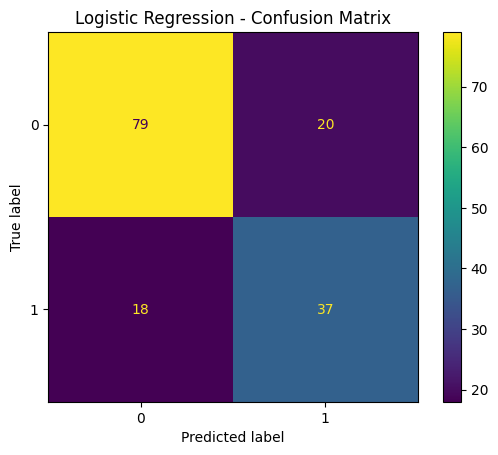

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix plot karo
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

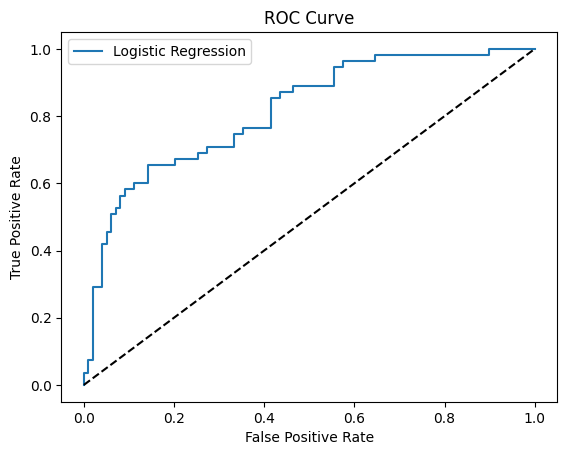

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Probability predictions lo
y_probs_log = log_model.predict_proba(X_test)[:, 1]

# ROC curve ke points calculate karo
fpr, tpr, thresholds = roc_curve(y_test, y_probs_log)

# Plot karo
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model banayein
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict karo test data pe
y_pred_tree = tree_model.predict(X_test)

# Output dekho
print("Predicted values (first 10):", y_pred_tree[:10])

Predicted values (first 10): [1 0 0 0 0 1 0 0 0 1]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation metrics for Decision Tree
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print("ROC AUC:", roc_auc_score(y_test, y_pred_tree))

Accuracy: 0.7337662337662337
Precision: 0.6029411764705882
Recall: 0.7454545454545455
F1 Score: 0.6666666666666666
ROC AUC: 0.7363636363636364


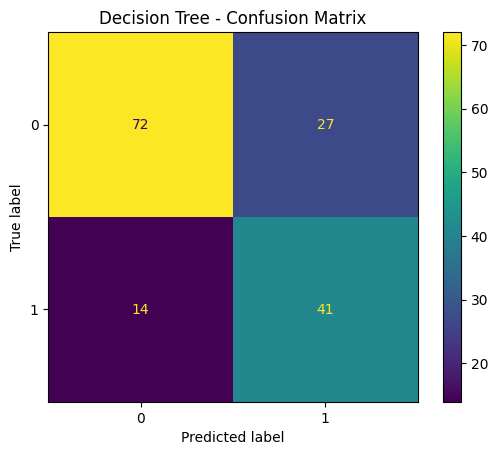

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

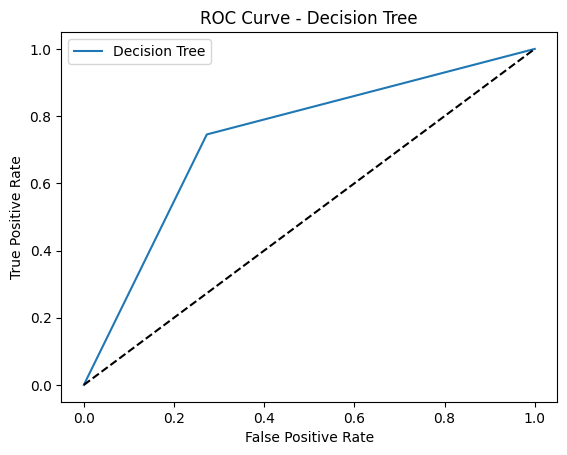

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Probability predictions lo
y_probs_tree = tree_model.predict_proba(X_test)[:, 1]

# ROC curve ke points calculate karo
fpr, tpr, thresholds = roc_curve(y_test, y_probs_tree)

# Plot karo
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model banayein
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Predict karo test data pe
y_pred_forest = forest_model.predict(X_test)

# Output dekho
print("Predicted values (first 10):", y_pred_forest[:10])

Predicted values (first 10): [0 0 0 0 1 1 0 1 1 1]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation metrics for Random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Precision:", precision_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest))
print("F1 Score:", f1_score(y_test, y_pred_forest))
print("ROC AUC:", roc_auc_score(y_test, y_pred_forest))

Accuracy: 0.7207792207792207
Precision: 0.6111111111111112
Recall: 0.6
F1 Score: 0.6055045871559633
ROC AUC: 0.693939393939394


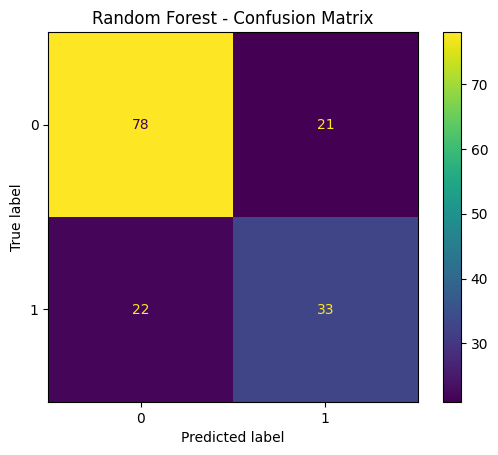

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(forest_model, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()

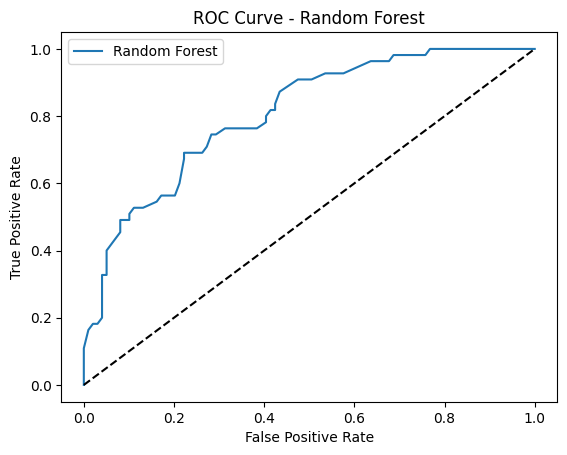

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Probability predictions lo
y_probs_forest = forest_model.predict_proba(X_test)[:, 1]

# ROC curve ke points calculate karo
fpr, tpr, thresholds = roc_curve(y_test, y_probs_forest)

# Plot karo
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()